Fellhipe Lorenzzo Gutierrez Fonseca

# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [ ]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE
import numpy as np
#print(x)
#print("Tam x: ", len(x))

pcol = []
for i in range (0, len(x)):
  pcol.append(1)

#print(pcol)

matriz= [ pcol, x]

#print("Matriz: ", matriz)



A_t = np.asarray(matriz, dtype=float)
#print(A_t)

A = np.transpose(A_t)
#print(A)

b = np.asarray(y, dtype=float)
#print(b)

m_final = A_t @ A
#print("M Final: \n")
#print(m_final)
v_final = A_t @ b
#print("V Final: \n")
#print(v_final)
conjunto_solucion = np.linalg.solve(m_final, v_final)
print("Valor de a_0: ", conjunto_solucion[0], ", valor de a_1: ", conjunto_solucion[1])
print("La linea recta más aproximada está dada por: ", conjunto_solucion[0], "+", conjunto_solucion[1], "x")

Valor de a_0:  -0.6479868958438233 , valor de a_1:  1.4650239944098675
La linea recta más aproximada está dada por:  -0.6479868958438233 + 1.4650239944098675 x


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

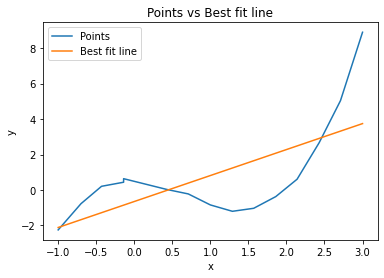

In [ ]:
# ... ENTER YOUR CODE HERE
# importing the required module
import matplotlib.pyplot as plt

def my_best_fit(x):
  #print(conjunto_solucion[0],  "+",  conjunto_solucion[1], "x")
  return (conjunto_solucion[0] + (conjunto_solucion[1]*x))

  
# x axis values
dom = x
# corresponding y axis values
ran = y

z = []
for elem in dom:
  ez = my_best_fit(elem)
  #print("x: ", elem, " f(x): ", ez )
  z.append( ez )
#for 
# plotting the points 
plt.plot(x, y, label = "Points")
plt.plot(x, z, label = "Best fit line")
  
# naming the domaxis
plt.xlabel('x')
# naming the ranaxis
plt.ylabel('y')
  
# giving a title to mrangraph
plt.title('Points vs Best fit line')
  
# function to show the plot
plt.legend()
plt.show()


#x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
#y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, without ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
#Factorize the design matrix A = QR
#print(r)
m = A.shape[1]
q, r = np.linalg.qr(A)
Q_t = np.transpose(q)
f = (Q_t @ y)[:m]
np.linalg.solve(r[:m],f)

array([-0.6479869 ,  1.46502399])

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

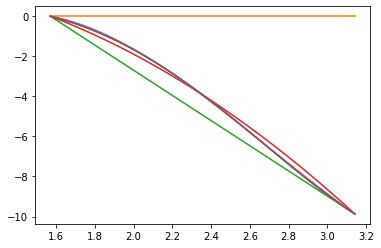

In [ ]:
def my_func(x):
    return x**2*np.cos(x)

def lagrange_interpolating_polynomial(interval, k, x):
    
    z = 1
    for i in range(len(interval)):
        if i!=k:
            z*=x-interval[i]
            z/=interval[k]-interval[i]    
            
    return z
	
	
def interpola_lagrange(interval, x, y):
    y_interp = np.zeros(len(x))
    for i in range(len(interval)):
        y_interp+=y[i]*lagrange_interpolating_polynomial(interval,i,x)
    return y_interp

x = np.linspace(np.pi/2,np.pi, 50)
plt.plot(x,my_func(x))

for m in range(1,6):
    interval = np.linspace(np.pi/2,np.pi, m)
    plt.plot(x, interpola_lagrange(interval, x, my_func(interval)))

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

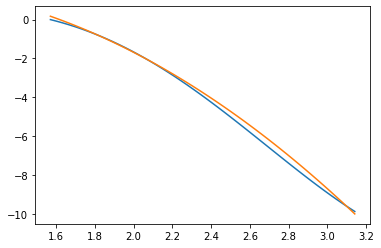

In [ ]:
# ... ENTER YOUR CODE HERE ...
def chebishev_nodes(a,b,m):
    k = np.array(range(m))
    x = np.cos(2*k+1/m)
    return (x+1)*(b-a)/2 + a
	
interval = chebishev_nodes(np.pi/2, np.pi, 3)

plt.plot(x,my_func(x))
plt.plot(x, interpola_lagrange(interval, x, my_func(interval)))